# Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for data viz
import matplotlib.pyplot as plt # for data viz
import plotly.express as px # for data viz
import plotly.graph_objects as go # for data viz
from plotly.subplots import make_subplots # for data viz
import plotly.figure_factory as ff  # for data viz
%matplotlib inline
from IPython import display 


# Read data

In [2]:
old_data = pd.read_csv("cars.csv") # to read data
old_data.head(5) # print first 5 rows in data

manufacturer_name model_name transmission   color  odometer_value  \
0            Subaru    Outback    automatic  silver          190000   
1            Subaru    Outback    automatic    blue          290000   
2            Subaru   Forester    automatic     red          402000   
3            Subaru    Impreza   mechanical    blue           10000   
4            Subaru     Legacy    automatic   black          280000   

   year_produced engine_fuel  engine_has_gas engine_type  engine_capacity  \
0           2010    gasoline           False    gasoline              2.5   
1           2002    gasoline           False    gasoline              3.0   
2           2001    gasoline           False    gasoline              2.5   
3           1999    gasoline           False    gasoline              3.0   
4           2001    gasoline           False    gasoline              2.5   

   ... feature_1  feature_2 feature_3 feature_4  feature_5  feature_6  \
0  ...      True       True      True     False       True      False   
1  ...      True      False     False      True       True      False   
2  ...      True      False     False     False      False      False   
3  ...     False      False     False     False      False      False   
4  ...      True      False      True      True      False      False   

  feature_7  feature_8  feature_9  duration_listed  
0      True       True       True               16  
1     False      False       True               83  
2     False       True       True              151  
3     False      False      False               86  
4     False      False       True                7  

[5 rows x 30 columns]

# Check if data is clean or not

In [3]:
old_data.info() # desplay if there is any nun values in any col

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

In [4]:
old_data.shape # tell us the shape if data

(38531, 30)

# Start clean data

### Drop col which not use

In [5]:
# to drop any col for data preprocessing
# nameOfData.drop([col name], axis=1) for drop col

data  = old_data.drop(['feature_0','feature_1', 'feature_2','feature_3','feature_4',
           'feature_5','feature_6','feature_7','feature_8','feature_9',
                      'number_of_photos','up_counter','duration_listed','location_region'], axis=1)
data.head(5)

manufacturer_name model_name transmission   color  odometer_value  \
0            Subaru    Outback    automatic  silver          190000   
1            Subaru    Outback    automatic    blue          290000   
2            Subaru   Forester    automatic     red          402000   
3            Subaru    Impreza   mechanical    blue           10000   
4            Subaru     Legacy    automatic   black          280000   

   year_produced engine_fuel  engine_has_gas engine_type  engine_capacity  \
0           2010    gasoline           False    gasoline              2.5   
1           2002    gasoline           False    gasoline              3.0   
2           2001    gasoline           False    gasoline              2.5   
3           1999    gasoline           False    gasoline              3.0   
4           2001    gasoline           False    gasoline              2.5   

   body_type  has_warranty  state drivetrain  price_usd  is_exchangeable  
0  universal         False  owned        all   10900.00            False  
1  universal         False  owned        all    5000.00             True  
2        suv         False  owned        all    2800.00             True  
3      sedan         False  owned        all    9999.00             True  
4  universal         False  owned        all    2134.11             True

In [6]:
data.info() # desplay if there is any nun values in any col

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
dtypes: bool(3), float64(2)

### Drop duplicates rows

In [7]:
data.drop_duplicates();

In [8]:
data.shape # tell us the shape if data

(38531, 16)

### Meta data
1. manufacturer_name >> The name of car manufacturer.

2. model_name >> The name of the model.

3. transmission >> Type of the transmission.

4. color >> Body color.

5. odometer_value >> Odometer state in kilometers.

6. year_produced >> The year the car has been produced.

7. engine_fuel >> Fuel type of the engine.

8. engine_has_gas >> Is the car equipped with propane tank and tubing?

9. engine_type >> Engine type.

10. engine_capacity >> The capacity of the engine in liters, numerical column

11. body_type >> Type of the body (hatchback, sedan, etc.

12. has_warranty >> Does the car have warranty? 

13. state >> New/owned/emergency.    "Emergency means the car has been damaged, sometimes severely."

14. drivetrain >> Front/rear/all drivetrain.

15. price_usd >> The price of a car as listed in the catalog in USD.

16. is_exchangeable >> If is_exchangeable is True the owner of the car is ready to exchange this car to other cars with little or no additional payment.


# Analys data

In [9]:
data.describe()

odometer_value  year_produced  engine_capacity     price_usd
count    38531.000000   38531.000000     38521.000000  38531.000000
mean    248864.638447    2002.943734         2.055161   6639.971021
std     136072.376530       8.065731         0.671178   6428.152018
min          0.000000    1942.000000         0.200000      1.000000
25%     158000.000000    1998.000000         1.600000   2100.000000
50%     250000.000000    2003.000000         2.000000   4800.000000
75%     325000.000000    2009.000000         2.300000   8990.000000
max    1000000.000000    2019.000000         8.000000  50000.000000

#### Most frequency Manufacturer name in catalog

In [11]:
fig = px.bar(data,data['manufacturer_name'].value_counts().head().index ## get index of unique values
             ,data['manufacturer_name'].value_counts().head()
            ,color=data['manufacturer_name'].value_counts().head().index
             ,color_continuous_scale='jet')
fig.show()

#### Count of automatic vs machanical cars in catalog

In [12]:
colors = ['lightgreen','gold'] # color for Graph

# Interactive pie chart (labels , values) 
fig = go.Figure(data=[go.Pie(labels=data["transmission"].value_counts().index
                             , values=data['transmission'].value_counts())])

# describe how pie chart look
fig.update_traces(hoverinfo='label+percent',
                  textinfo='value',
                  textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

#### The car price according to it's automatic or machanical car

<AxesSubplot:xlabel='transmission', ylabel='price_usd'>

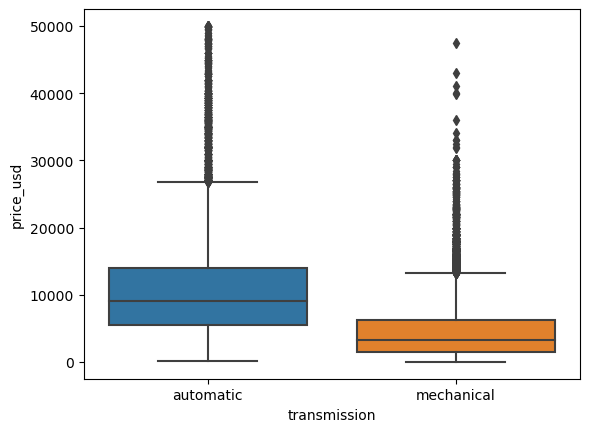

In [13]:
sns.boxplot(x="transmission", y="price_usd", data=data)

#### Count of all body type in catalog

In [14]:
fig = px.bar(data 
             ,data['body_type'].value_counts().index ## get index of unique values
             ,data['body_type'].value_counts()
            ,color=data['body_type'].value_counts().index
             ,color_continuous_scale='jet')

fig.show()

#### The distribution of  cars price according to the bady type of car 

In [15]:
fig = px.box(data,x="body_type",y="price_usd",color="body_type")
fig.show()

#### The distribution of  cars price according to the bady type of car  and its manufacturer name

In [16]:
fig = px.box(data,x="manufacturer_name",y="price_usd",color="body_type")
fig.show()

#### The distribution of  cars price according to  if it has warranty or not

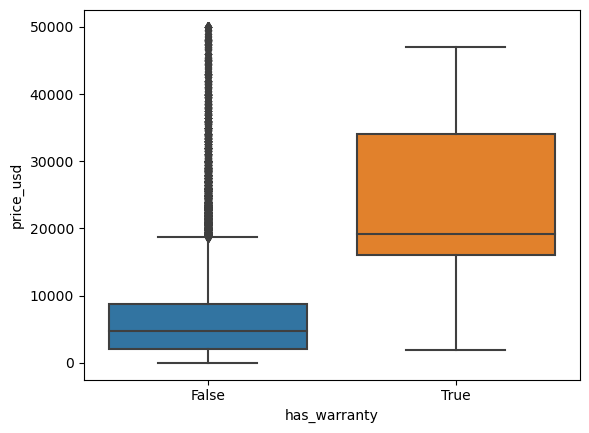

In [17]:
sns.boxplot(x="has_warranty", y="price_usd", data=data);

#### Count of all cars in catalog according to drivetrain

In [18]:
colors = ['lightgreen','gold','mediumturquoise'] # color for Graph

# Interactive pie chart (labels , values) 
fig = go.Figure(data=[go.Pie(labels=data["drivetrain"].value_counts().index
                             , values=data['drivetrain'].value_counts())])

# describe how pie chart look
fig.update_traces(hoverinfo='label+percent',
                  textinfo='value',
                  textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

#### The distribution of  cars price according to drivetrain

In [19]:
fig = px.box(data,x="drivetrain",y="price_usd",color="drivetrain")
fig.show()

#### Count of all cars in catalog according to engine fuel

In [20]:
fig = px.bar(data 
             ,data['engine_fuel'].value_counts().index ## get index of unique values
             ,data['engine_fuel'].value_counts()
            ,color=data['engine_fuel'].value_counts().index
             ,color_continuous_scale='jet')

fig.show()

#### The distribution of  cars price according to engine fuel

In [21]:
fig = px.box(data,x="engine_fuel",y="price_usd",color="engine_fuel")
fig.show()

#### The distribution of  cars price according to engine capacity

<AxesSubplot:xlabel='engine_binned', ylabel='price_usd'>

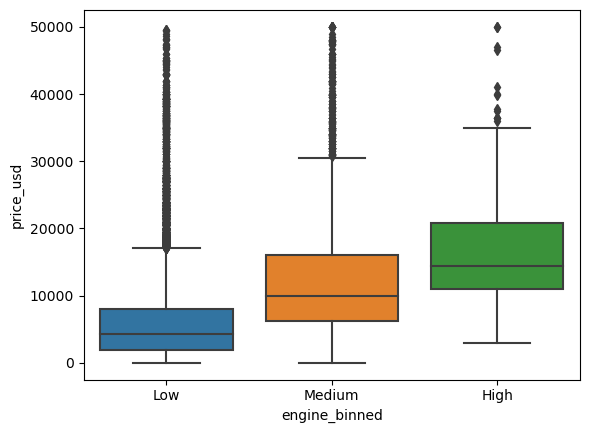

In [22]:
import pandas as pd

df = pd.DataFrame(data)
# Use the cut method on a Series
bins = np.linspace(min(data['engine_capacity']), 
                  max(data['engine_capacity']),4)
labels = ['Low','Medium','High']
data['engine_binned'] = pd.cut(df['engine_capacity'], bins=bins, labels=labels)

sns.boxplot(x="engine_binned", y="price_usd", data=data)

#### Correlation between attributes

In [23]:
corr= data.corr()
corr

odometer_value  year_produced  engine_has_gas  \
odometer_value         1.000000      -0.488679        0.057786   
year_produced         -0.488679       1.000000       -0.074686   
engine_has_gas         0.057786      -0.074686        1.000000   
engine_capacity        0.105704       0.005059        0.084579   
has_warranty          -0.189498       0.209231       -0.020667   
price_usd             -0.421204       0.705511       -0.062528   
is_exchangeable        0.042342      -0.057937        0.018646   

                 engine_capacity  has_warranty  price_usd  is_exchangeable  
odometer_value          0.105704     -0.189498  -0.421204         0.042342  
year_produced           0.005059      0.209231   0.705511        -0.057937  
engine_has_gas          0.084579     -0.020667  -0.062528         0.018646  
engine_capacity         1.000000     -0.054583   0.296597         0.081636  
has_warranty           -0.054583      1.000000   0.285532         0.117775  
price_usd               0.296597      0.285532   1.000000        -0.000503  
is_exchangeable         0.081636      0.117775  -0.000503         1.000000

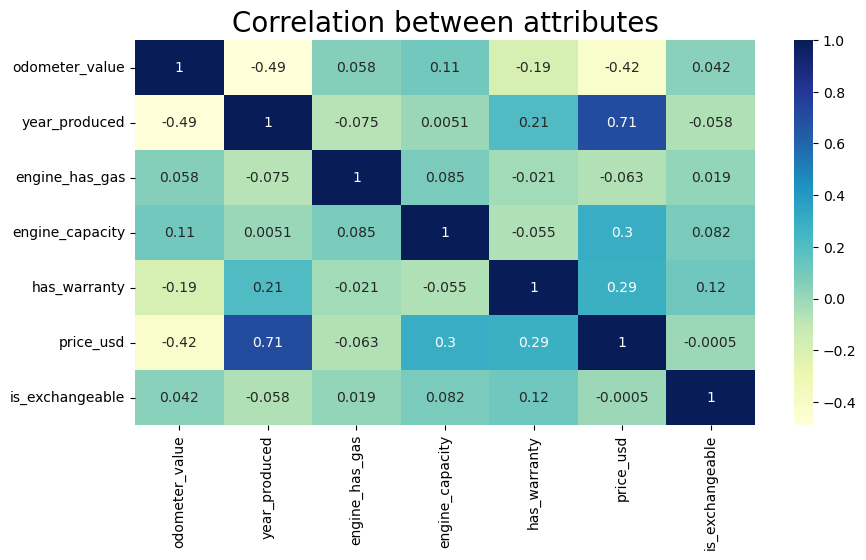

In [24]:
#static corelation heatmap

plt.figure(figsize=[10,5])  ## for figure size
plt.title('Correlation between attributes', fontsize= 20)  ##set graph title 

## heatmap(data corelation ,change heatmap color , add a number on each cell=true )

fields_correlation = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

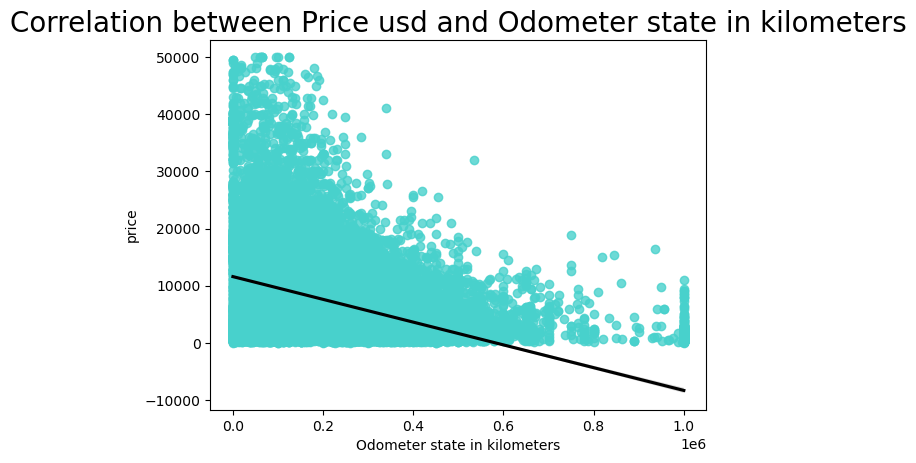

In [25]:
sns.regplot(data = data, x = 'odometer_value', y = 'price_usd',
            scatter_kws={"color": "mediumturquoise"}, line_kws={"color": "black"});

plt.title('Correlation between Price usd and Odometer state in kilometers', fontsize= 20) ## graph title
plt.xlabel("Odometer state in kilometers"); ## x-axis label
plt.ylabel("price"); ## y-axis label

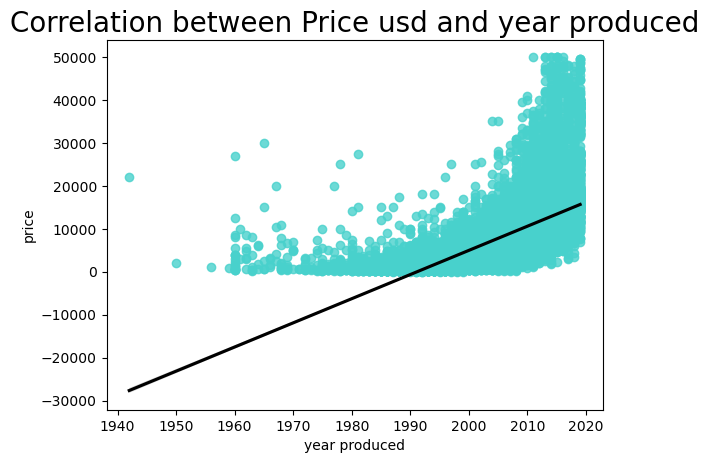

In [26]:
sns.regplot(data = data, x = 'year_produced', y = 'price_usd',
            scatter_kws={"color": "mediumturquoise"}, line_kws={"color": "black"});

plt.title('Correlation between Price usd and year produced', fontsize= 20); ## graph title
plt.xlabel("year produced"); ## x-axis label
plt.ylabel("price"); ## y-axis label